# Linked lists - OpenMP Parrallel programming

---

Análisis de programa paralelo en C con OpenMP.

Objetivo: Analizar el algoritmo de una lista ligada simple con openMP


Analizar el algoritmo de inlsución de nodos dentro de una lista ligada simple utilizando un enfoque paralelo con ciclos for contra el análisis de utilizando tasks en openMP.

Tomar en cuenta el tiempo de ejecución utilizando diferentes número de threads.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
serial_time = 10.231261 #seconds

THREADS = [1,2,3,4,5,6,7,8]
FOR = [10.088770, 2.625780, 1.658363, 2.621439, 4.250850, 0.429893, 0.449765, 0.430891]
TASK = [10.227955, 6.256181, 4.823556, 5.470498, 6.120027, 6.395203, 6.643875, 6.368354]

In [3]:
x = THREADS
labels = ["For", "Task"]
colors = ["red", "blue"]

In [4]:
table = pd.DataFrame({'Threads': THREADS,
                      'FOR': FOR,
                      'TASK': TASK
                      })

In [5]:
print("----- Tabla de tiempos de ejecución en segundos -----")
table

----- Tabla de tiempos de ejecución en segundos -----


,Threads,FOR,TASK
0,1,10.088770,10.227955
1,2,2.625780,6.256181
2,3,1.658363,4.823556
3,4,2.621439,5.470498
4,5,4.250850,6.120027
5,6,0.429893,6.395203
6,7,0.449765,6.643875
7,8,0.430891,6.368354


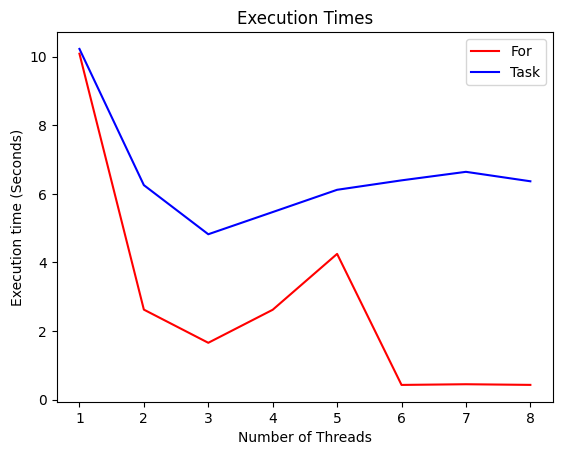

In [6]:
plt.title("Execution Times")
plt.xlabel("Number of Threads")
plt.ylabel("Execution time (Seconds)")
for i in range(2):
  y = table[table.columns[i+1]]  # Select the i-th column as the y-values
  plt.plot(x, y, color=colors[i], label=labels[i])

plt.legend()
plt.show()

Tablas de Métricas

Métricas: *Speedup, Efficiency, parallelizability*

In [10]:
# SPEEDUP

for_speedup, for_eff, for_par = [0]*8, [0]*8, [0]*8
task_speedup, task_eff, task_par = [0]*8, [0]*8, [0]*8

for i in range(8):

  for_speedup[i] = serial_time / FOR[i]
  for_eff[i] = np.round((for_speedup[i]/THREADS[i]), 2)
  for_par[i] = FOR[0]/FOR[i]

  task_speedup[i] = serial_time / TASK[i]
  task_eff[i] = np.round((task_speedup[i]/THREADS[i]), 2)
  task_par[i] = TASK[0]/TASK[i]


In [11]:
print("----- Tabla de Speedup -----")
speedup_table = pd.DataFrame({'Threads': THREADS,
                              'FOR': for_speedup,
                              'TASK': task_speedup})

speedup_table

----- Tabla de Speedup -----


,Threads,FOR,TASK
0,1,1.014124,1.000323
1,2,3.896465,1.635384
2,3,6.169494,2.121103
3,4,3.902918,1.870261
4,5,2.406874,1.671767
5,6,23.799552,1.599834
6,7,22.748015,1.539954
7,8,23.744430,1.606579


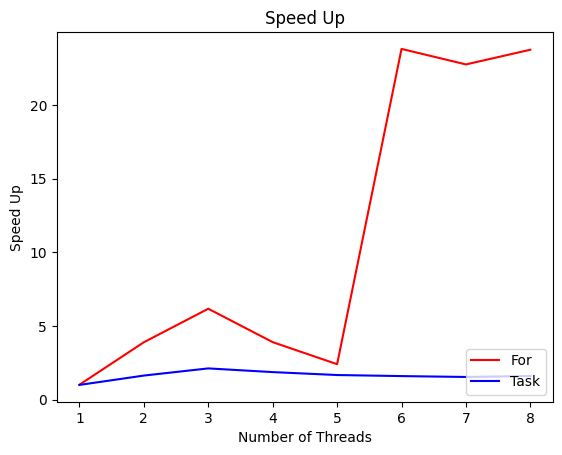

In [12]:
plt.title("Speed Up")
plt.xlabel("Number of Threads")
plt.ylabel("Speed Up")
for i in range(2):
  y = speedup_table[speedup_table.columns[i+1]]  # Select the i-th column as the y-values
  plt.plot(x, y, color=colors[i], label=labels[i])

plt.legend(loc="lower right")
plt.show()

In [13]:
print("----- Tabla de Eficiencia -----")
efficiency_table = pd.DataFrame({'Threads': THREADS,
                              'FOR': for_eff,
                              'TASK': task_eff
                              })

efficiency_table

----- Tabla de Eficiencia -----


,Threads,FOR,TASK
0,1,1.01,1.00
1,2,1.95,0.82
2,3,2.06,0.71
3,4,0.98,0.47
4,5,0.48,0.33
5,6,3.97,0.27
6,7,3.25,0.22
7,8,2.97,0.20


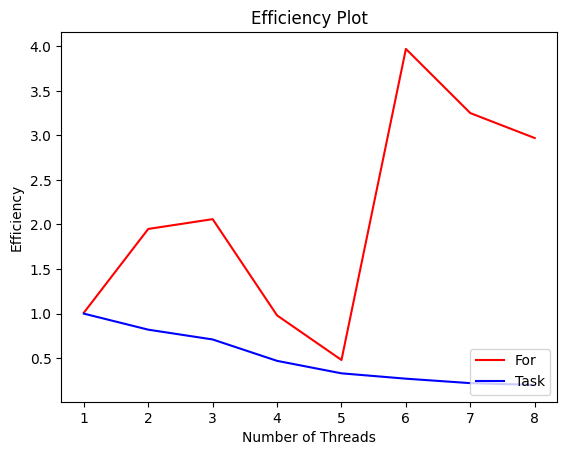

In [14]:
plt.title("Efficiency Plot")
plt.xlabel("Number of Threads")
plt.ylabel("Efficiency")
for i in range(2):
  y = efficiency_table[efficiency_table.columns[i+1]]  # Select the i-th column as the y-values
  plt.plot(x, y, color=colors[i], label=labels[i])

plt.legend(loc="lower right")
plt.show()

In [15]:
print("----- Tabla de Paralelicibilidad -----")
parallelizability_table = pd.DataFrame({'Threads': THREADS,
                              'FOR': for_par,
                              'TASK': task_par})

parallelizability_table

----- Tabla de Paralelicibilidad -----


,Threads,FOR,TASK
0,1,1.000000,1.000000
1,2,3.842199,1.634856
2,3,6.083572,2.120418
3,4,3.848562,1.869657
4,5,2.373354,1.671227
5,6,23.468096,1.599317
6,7,22.431203,1.539456
7,8,23.413740,1.606059


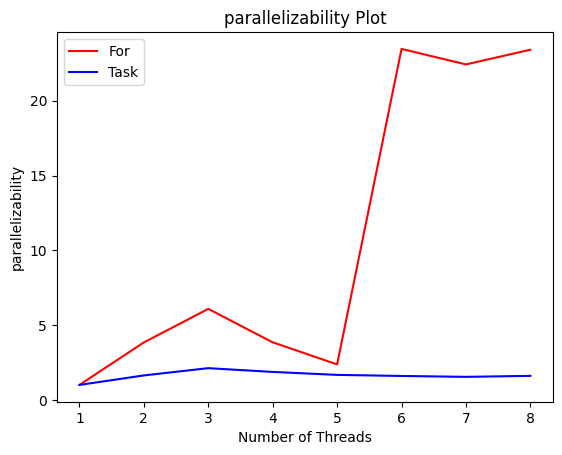

In [16]:
plt.title("parallelizability Plot")
plt.xlabel("Number of Threads")
plt.ylabel("parallelizability")
for i in range(2):
  y = parallelizability_table[parallelizability_table.columns[i+1]]  # Select the i-th column as the y-values
  plt.plot(x, y, color=colors[i], label=labels[i])

plt.legend()
plt.show()

### Conclusiones y análisis


Se puede observar que al principio, al correr el código secuencial podemos observar que tiene sentido que el tiempo que tarda. En este caso tarda alrededor de los 10 segundos, y cuando se corre el código utilizando solo el For paralelo con 1 thread y el código que utiliza Task ambos tardan alrededor de los 10 segundos.

En el caso del código que utiliza el For, al medida que se van aumentando los Threads, si disminuye el tiempo como se espera, pero en el caso del thread a al 5, el tiempo vuelve a aumentar. (se observa en la gráfica de tiempo). A decir verdad, no sé qué tanto esté afectando la arquitectura de la computadora.

En el caso del task, el tiempo al inicio parece tener sentido, con 1 Thread alrededor de los 10 segundos, ya que el mismo thread crea la task y después la resuelve, entonces tiene sentido que tarde casi el mismo tiempo que el secuencial. Conforme se aumentan los threads, si disminuye el tiempo de ejecución y sus métricas se ven afectadas, pero de igual forma al llegar 4 Threads, el tiempo de ejecución comienza a aumentar.

Al parecer cuando se utiliza el Task, como se tienen varios elementos adicionales implícitos, barrier, wait, y que en la primera iteración 1 thread debe crear las task y en la siguiente iteración del ciclo ya los threads comienzan a resolver esas tasks, los threads deben esperar a que todos los demás terminen de realizar las tareas de procesar, entonces tiene sentido que el tiempo de ejecución aumente con respecto a la cantidad de threads.

Entonces al parecer, el approach de utilizar tasks no tiene mucho sentido que se utilice para paralelizar el algoritmo de una lista ligada simple, además el tipo de esturcutra de dato tiene una cierta "naturaleza" de ser secuencial al ser una lista ligada simple y todas las operaciones de las listas ligadas simples tienen dependencia con nodos anteriores, por lo tanto creo que si es prudente pensar que al paralelizar la solución, entre más threads se utilicen, el tiempo no hara mucha diferencia y entonces no es tan necesario forzar gasto computacional en paralelizar esta solución.